In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

Using matplotlib backend: MacOSX


In [2]:
import sys
sys.path.insert(0,'..')
from pyASTRAHL.api import * 

In [3]:
output_folder = "../evaluation/settings"

FT_file = os.path.join(output_folder, "fault_trees.json")
SP_theoretical_file = os.path.join(output_folder, "starting_points_theoretical.json")
SP_empirical_file = os.path.join(output_folder, "starting_points_empirical.json")
FDist_file = os.path.join(output_folder, "fault_distributions_for_empirical.json")

# Fault Trees

In [4]:
ft_df = pd.read_json(FT_file)
ft_df

,FaultTree
0,"{'type': 'and', 'name': '', 'subtree1': {'type..."
1,"{'type': 'or', 'name': '', 'subtree1': {'type'..."
10,"{'type': 'and', 'name': '', 'subtree1': {'type..."
100,"{'type': 'and', 'name': '', 'subtree1': {'type..."
101,"{'type': 'or', 'name': '', 'subtree1': {'type'..."
...,...
95,"{'type': 'or', 'name': '', 'subtree1': {'type'..."
96,"{'type': 'or', 'name': '', 'subtree1': {'type'..."
97,"{'type': 'and', 'name': '', 'subtree1': {'type..."
98,"{'type': 'or', 'name': '', 'subtree1': {'type'..."


Display the FTs

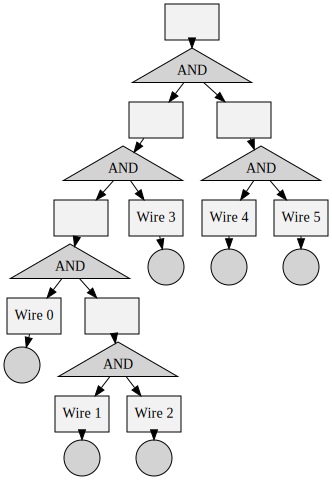

In [5]:
FT_index = 88  # the index of the line
ft_json = ft_df.loc[FT_index]["FaultTree"]
FT = FaultTree.from_json(ft_json)
display(FT.draw())


In [6]:
conf_function = 1 - 0.99 ** (Var() + 1) 

# Starting Points (for theoretical evaluations) and plot the values
Each of these starting points will be run with each of the fault trees

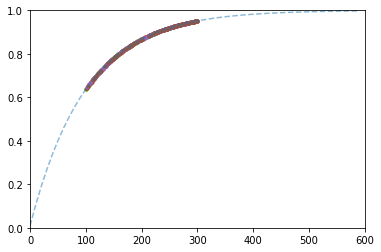

In [7]:
theo_sp_df = pd.read_json(SP_theoretical_file)
ax = None
for c in theo_sp_df.columns:
    plt.scatter(x=theo_sp_df[c].to_list(), y=theo_sp_df[c].apply(lambda x: conf_function(x)).to_list(), marker=".")
plt.xlim(0, 600)
plt.ylim(0, 1)

# plot base function
xs = np.arange(0, 600, 10)
ys = [conf_function(x) for x in xs]
_ = plt.plot(xs, ys, ls="--", alpha=0.5,)

# Starting Points (for empirical evaluations) and plot the values
Each of these starting points will be run with each of the fault trees

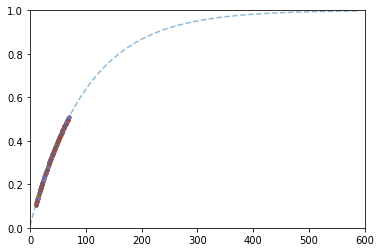

In [8]:
emp_sp_df = pd.read_json(SP_empirical_file)
ax = None
for c in theo_sp_df.columns:
    plt.scatter(x=emp_sp_df[c].to_list(), y=emp_sp_df[c].apply(lambda x: conf_function(x)).to_list(), marker=".")
plt.xlim(0, 600)
plt.ylim(0, 1)

# plot base function
xs = np.arange(0, 600, 10)
ys = [conf_function(x) for x in xs]
_ = plt.plot(xs, ys, ls="--", alpha=0.5,)

# Fault Distributions

In [9]:
fd_df = pd.read_json(FDist_file)
fd_df

,Wire 0,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,SP_idx,Wire 0 Faults,Wire 1 Faults,Wire 2 Faults,Wire 3 Faults,Wire 4 Faults,Wire 5 Faults
0,26.115131,30.297281,52.637978,62.484968,23.316345,45.886808,0,2,3,1,2,1,1
1,26.115131,30.297281,52.637978,62.484968,23.316345,45.886808,0,1,1,4,1,1,1
2,26.115131,30.297281,52.637978,62.484968,23.316345,45.886808,0,1,1,1,1,1,1
3,26.115131,30.297281,52.637978,62.484968,23.316345,45.886808,0,1,2,1,2,1,4
4,26.115131,30.297281,52.637978,62.484968,23.316345,45.886808,0,1,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,47.726037,27.707692,40.644225,69.970971,48.932711,63.640094,49,1,1,1,1,1,1
2496,47.726037,27.707692,40.644225,69.970971,48.932711,63.640094,49,3,1,1,2,1,1
2497,47.726037,27.707692,40.644225,69.970971,48.932711,63.640094,49,2,2,1,1,1,1
2498,47.726037,27.707692,40.644225,69.970971,48.932711,63.640094,49,1,2,2,1,3,1


## Print Fault Distributions for a specific starting point

In [10]:
sp_idx = 3
fd_df[fd_df["SP_idx"] == 22]

,Wire 0,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,SP_idx,Wire 0 Faults,Wire 1 Faults,Wire 2 Faults,Wire 3 Faults,Wire 4 Faults,Wire 5 Faults
1100,22.171348,47.968721,66.63315,67.126002,69.717148,61.558333,22,1,1,1,1,1,1
1101,22.171348,47.968721,66.63315,67.126002,69.717148,61.558333,22,1,1,2,1,2,2
1102,22.171348,47.968721,66.63315,67.126002,69.717148,61.558333,22,1,1,1,2,1,3
1103,22.171348,47.968721,66.63315,67.126002,69.717148,61.558333,22,1,2,2,1,2,1
1104,22.171348,47.968721,66.63315,67.126002,69.717148,61.558333,22,1,4,2,3,2,1
1105,22.171348,47.968721,66.63315,67.126002,69.717148,61.558333,22,1,1,1,1,1,2
1106,22.171348,47.968721,66.63315,67.126002,69.717148,61.558333,22,1,1,4,2,1,1
1107,22.171348,47.968721,66.63315,67.126002,69.717148,61.558333,22,2,2,5,4,1,1
1108,22.171348,47.968721,66.63315,67.126002,69.717148,61.558333,22,1,1,6,1,1,1
1109,22.171348,47.968721,66.63315,67.126002,69.717148,61.558333,22,1,1,1,1,1,2
